- binary classification
- multiclass classification(animal,bird)
- multi label calssification((comedy,horror))
-

- [batch_size,color_channels,width,height]
- shape = [32,3,224,224]


## architecture
- input layer shape (in features - age sex, height,weight,smoking 5)
- hidden layers(s)
- neuron per hidden layer
- output layer shape
- hidden layer activation
- output activation
- loss function
- optimizer

In [ ]:
import torch

In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles
n_samples=1000
X,y=make_circles(n_samples,noise=0.03,random_state=42)

In [ ]:
import pandas as pd
circles=pd.DataFrame({"X1":X[:,0],
                      "X2":X[:,1],
                      "label":y})

In [ ]:
circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


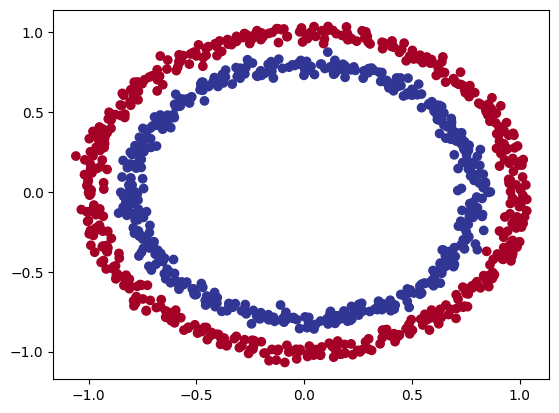

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],y=X[:,1],c=y,cmap=plt.cm.RdYlBu)
plt.show()

In [ ]:
X.shape,y.shape

((1000, 2), (1000,))

In [ ]:
x_sample=X[0]
y_sample=y[0]

In [ ]:
 x_sample

array([0.75424625, 0.23148074])

In [ ]:
y_sample

1

In [ ]:
x_sample.shape,y_sample.shape

((2,), ())

In [ ]:
type(X),X.dtype

(numpy.ndarray, dtype('float64'))

In [ ]:
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)
X[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
type(X),X.dtype,y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
len(x_train)

800

In [ ]:
import torch
from torch import nn
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
x_train.device

device(type='cpu')

In [ ]:
class circlemodel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2,out_features=5)
    self.layer_2=nn.Linear(in_features=5,out_features=1)
  def forward(self,x):
    return self.layer_2(self.layer_1(x))
model_0=circlemodel().to(device)

In [ ]:
model_0

In [ ]:
###tensorflow playground

In [ ]:
## recreating with nn.Sequential

In [ ]:
model0=nn.Sequential(nn.Linear(in_features=2,out_features=5),
                     nn.Linear(in_features=5,out_features=1)).to(device)


In [ ]:
model0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
  '''
  __init__
  self.two_lin=nn.Sequential(nn.Linear(in_features=2,out_features=5),
                     nn.Linear(in_features=5,out_features=1))
  def forward(self,x):
    return two_lin(x)
    '''

'\n__init__\nself.two_lin=nn.Sequential(nn.Linear(in_features=2,out_features=5),\n                   nn.Linear(in_features=5,out_features=1))\ndef forward(self,x):\n  return two_lin(x)\n  '

In [ ]:
model0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5888, -0.4077],
                      [-0.5085,  0.3484],
                      [-0.5906,  0.3476],
                      [-0.1629, -0.1784],
                      [ 0.0769, -0.5578]])),
             ('0.bias', tensor([-0.6137, -0.6452, -0.0348, -0.6606,  0.2649])),
             ('1.weight',
              tensor([[ 0.1399,  0.0687,  0.1001, -0.4067, -0.3398]])),
             ('1.bias', tensor([0.3671]))])

In [ ]:
untrained_preds=model0(x_test.to(device))
print(len(untrained_preds))

200


In [ ]:
untrained_preds.shape

torch.Size([200, 1])

In [ ]:
len(x_test),x_test.shape

(200, torch.Size([200, 2]))

In [ ]:
loss_fn=nn.BCELoss()
loss_fn=nn.BCEWithLogitsLoss()

In [ ]:
optim=torch.optim.SGD(params=model0.parameters(),lr=0.1 )
model0.state_dict()

In [ ]:
def acc(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred))*100
  return acc

In [ ]:
model0.eval()
with torch.inference_mode():
  y_logits=model0(x_test.to(device))[:5]
y_logits

In [ ]:
y_test[:5]

In [ ]:
y_pred_probs=torch.sigmoid(y_logits)
y_pred_probs

In [ ]:
torch.round(y_pred_probs)


In [ ]:
y_pred_labels=torch.round(torch.sigmoid(model0(x_test.to(device))[:5]))

In [ ]:
print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))

In [ ]:
y_preds.squeeze()

In [ ]:
epochs=100
x_train,y_train=x_train.to(device),y_train.to(device)
x_test,y_test=x_test.to(device),y_test.to(device)
for epoch in range(epochs):
  model0.train()
  y_logits=model0.(x_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))
  loss=loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model0.eval()
  with torch.inference_mode():
    test_logits=model0(x_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

    test_loss=loss_fn(test_logits,
                      y_test)
    test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)
  if epoch % 10 == 0:
    print(f"epoch:{epoch} | loss : {loss:.5f}, acc: {acc: .2f}% test loss {test_loss:.5f} tset accuracy: {test_acc:.2f}%")

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2,out_features=10)
    self.layer_2=nn.Linear(in_features=10,out_features=10)
    self.layer_3=nn.Linear(in_features=10,out_features=1)
  def forward(self,x):
    z=self.layer_1(x)
    z=self.layer_2(z)
    z=self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1=CircleModelV1().to(device)
model_1

In [ ]:
epochs=1000
x_train,y_train=x_train.to(device),y_train.to(device)
x_test,y_test=x_test.to(device),y_test.to(device)
for epoch in range(epochs):
  model_1.train()
  y_logits=model_1(x_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))
  loss=loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_1.eval()
  with torch.inference_mode():
    test_logits=model_1(x_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))
    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)
  if epoch % 100 ==0:
    print(f"epoch{epoch} loss :{loss:.5f} acc:{acc:.2f}")



## replicating non linear activation functions

In [2]:
import torch

In [4]:
a=torch.arange(-10,10,0.1)
a.dtype

torch.float32

In [5]:
import matplotlib.pyplot as plt

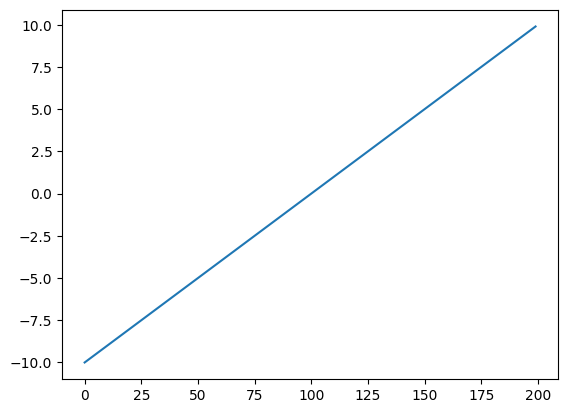

In [6]:
plt.plot(a)

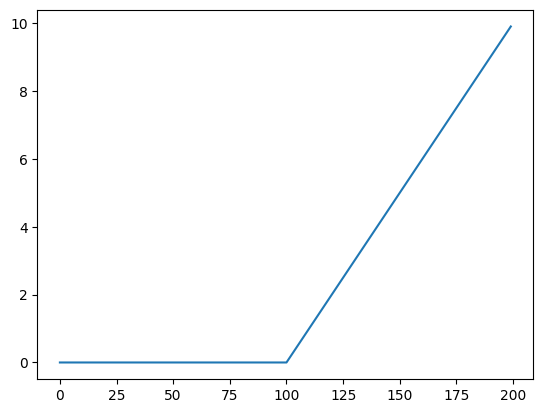

In [7]:
b=torch.relu(a)
plt.plot(b)

In [9]:
#max(0,x)

In [10]:
def relu(x:torch.Tensor)->torch.Tensor:
  return torch.maximum(torch.tensor(0),x)

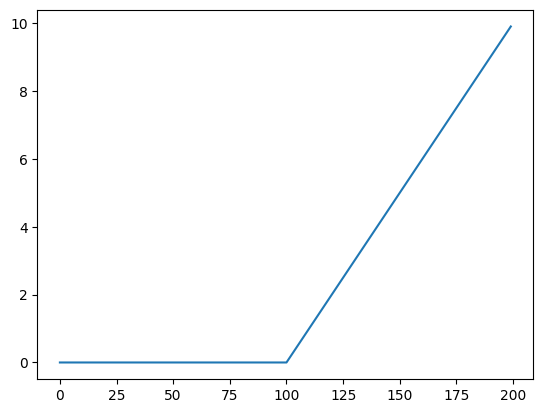

In [11]:
z=relu(a)
plt.plot(z)

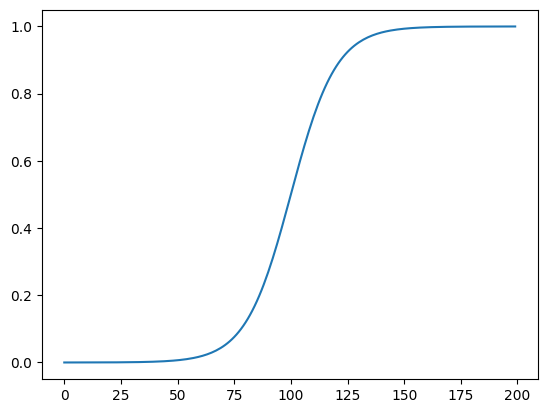

In [12]:
s=torch.sigmoid(a)
plt.plot(s)

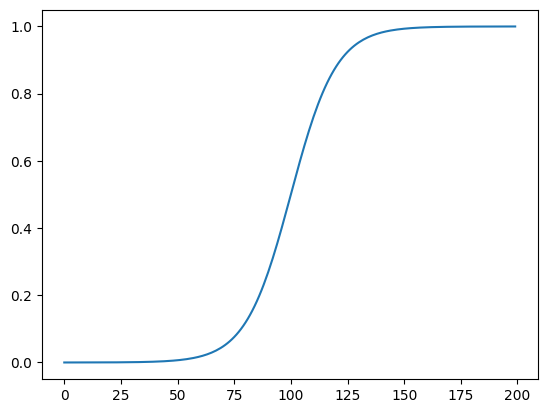

In [13]:
def sig(x:torch.Tensor)->torch.Tensor:
  return 1/(1+torch.exp(-x))
d=sig(a)
plt.plot(d)

In [ ]:
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2,out_features=10)
    self.layer_2=nn.Linear(in_features=10,out_features=10)
    self.layer_3=nn.Linear(in_features=10,out_features=1)
    self.relu=nn.ReLU()

  def forward(self,x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_1=CircleModelV2().to(device)
model_1